Import the modules that will be used.

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

Vector Dot product has a computational complexity of $O(n)$ \\
Matrix Vector product has a complexity of $O(n^2)$ \\
Matrix Matrix product has a complexity of $O(n^3)$



YOUR ANSWER HERE

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [2]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1)*n

The function calls itself (recursively) $n$ times, hence it has complexity O(n)

---

$. We test this below and plot
the times.

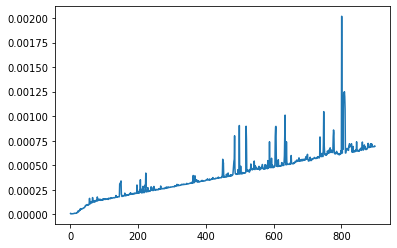

In [13]:
# YOUR CODE HERE

inputs = np.arange(1,900,1)

x = []
y = []

np.warnings.filterwarnings('ignore', 'overflow')

for i in inputs:
  t = %timeit -q -n4 -r1 -o factorial(i)
  x.append(i)
  y.append(t.best)

plt.plot(x,y)
# roughly straight line => O(n)

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [6]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [7]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [22]:
# Create array of problem sizes we want to test (powers of 2)
N = 2**np.arange(2, 12)
 
# YOUR CODE HERE
def n_by_n_determinant(n):
  A = np.random.rand(n, n)
  det = np.linalg.slogdet(A)
  return det

y = []

for n in N:
  t = %timeit -q -n4 -r1 -o n_by_n_determinant(n)
  y.append(t.best)
  
y = np.array(y)

Plot result:

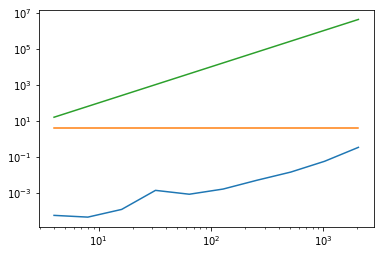

In [42]:
# YOUR CODE HERE
import scipy

a,b = np.polyfit(np.log(N), np.log(y), 1)

plt.loglog(N, y)   # looks like O(n**2)
plt.loglog(N, N[0]*np.ones_like(N))
plt.loglog(N, N**2)
